In [64]:
print("Lord_Balaji")

Lord_Balaji


<h1 align = center style = color:blue>K-mean Clustering</h1>

<h3 style = color:red>1 Upload Libraries</h3>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3 style = color:red>2 Upload Dataset<h3>

In [66]:
df = pd.read_csv("E:\Python_Vedeo\DataSets\Income\income.csv")

In [67]:
df.head(3)

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [68]:
df.shape

(22, 3)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


TypeError: 'str' object is not callable

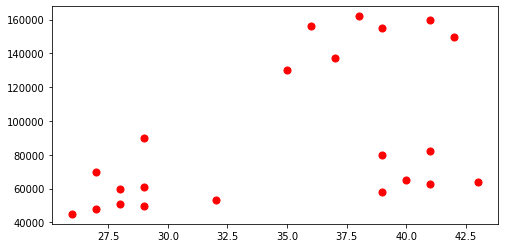

In [70]:
plt.figure(figsize=(8,4))
plt.scatter(df.Age, df.Income, s= 50,c='red')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend
plt.show()

In [71]:
from sklearn.cluster import KMeans

In [72]:
km = KMeans(n_clusters=3)

In [73]:
y_predicted = km.fit_predict(df[['Age','Income']])

In [74]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [75]:
df['Cluster'] = y_predicted

In [76]:
df.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [77]:
df['Cluster'].unique()

array([2, 0, 1])

In [78]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [79]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

In [44]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(7, 4)
(11, 4)
(4, 4)


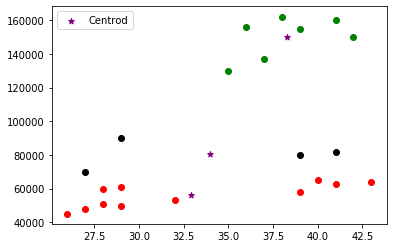

In [80]:
plt.scatter(df1.Age, df1.Income, c= 'red')
plt.scatter(df2.Age, df2.Income, c= 'green')
plt.scatter(df3.Age, df3.Income, c= 'black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label = 'Centrod', marker = "*", color = 'purple')
plt.xlabel = 'Age'
plt.ylabel = 'Income'
plt.legend()
plt.show()

<h3 style = color:red>Prepocessing using minmax scalor</h3>

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scalar = MinMaxScaler()

In [83]:
scalar.fit(df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [84]:
df['Age'] = scalar.transform(df[['Age']])

In [85]:
df.head(5)

,Name,Age,Income,Cluster
0,Rob,0.058824,70000,2
1,Michael,0.176471,90000,2
2,Mohan,0.176471,61000,0
3,Ismail,0.117647,60000,0
4,Kory,0.941176,150000,1


In [87]:
scalar.fit(df[['Income']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [88]:
df['Income'] = scalar.transform(df[['Income']])

In [90]:
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [91]:
km1 = KMeans(n_clusters=3)

In [93]:
y_predicted_new = km1.fit_predict(df[['Age', 'Income']])

In [94]:
df['New_Cluster'] = y_predicted_new

In [95]:
df.head()

,Name,Age,Income,Cluster,New_Cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,0


In [96]:
km1.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [98]:
df1 = df[df['New_Cluster']==0]
df2 = df[df['New_Cluster']==1]
df3 = df[df['New_Cluster']==2]

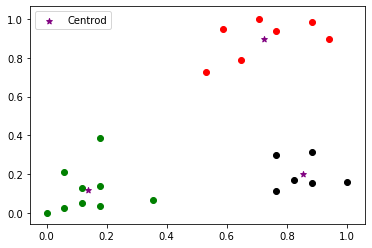

In [100]:
plt.scatter(df1.Age, df1.Income, c= 'red')
plt.scatter(df2.Age, df2.Income, c= 'green')
plt.scatter(df3.Age, df3.Income, c= 'black')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],label = 'Centrod', marker = "*", color = 'purple')
plt.xlabel = 'Age'
plt.ylabel = 'Income'
plt.legend()
plt.show()

<h3 style = color:red>Elbo Plot</h3>

In [102]:
k_range = range(1,10)

In [105]:
sse = []

In [106]:
for k in k_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['Age', 'Income']])
    sse.append(km2.inertia_)

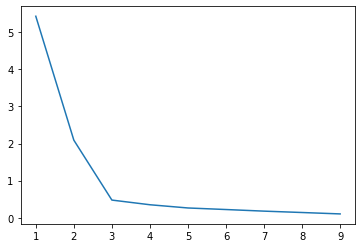

In [111]:
plt.plot(k_range, sse)
plt.ylabel = 'SSE'
plt.show()